https://freedium.cfd/https://medium.com/@vipra_singh/llm-architectures-explained-word-embeddings-part-2-ff6b9cf1d82d

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

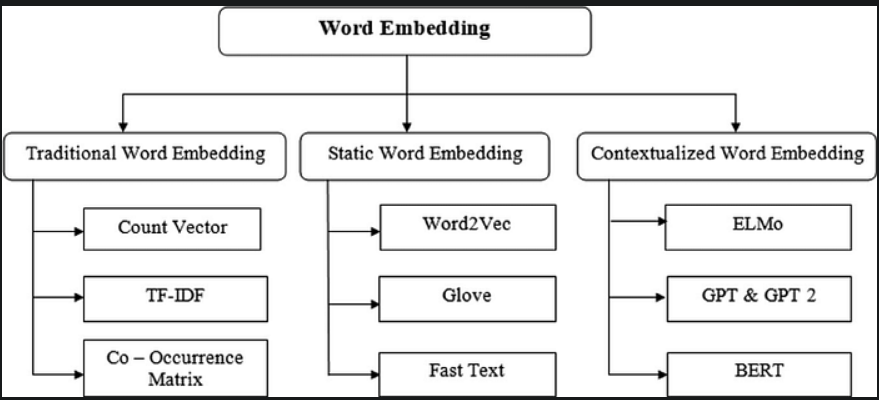

# Bag OF words

#### Disadvantages
  - Don't capture semantic meaning
  - Don't maintanin the sequence
  - as vocab increase diamention of vector also increases
  - It's just a bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
documents = [
    "Machine learning is is a branch of artificial intelligence.",
    "Natural language processing is a part of machine learning.",
    "Word2Vec is a popular algorithm for learning word representations.",
    "Deep learning models have shown great performance in NLP tasks."
]


bow= CountVectorizer()
bow_matrix= bow.fit_transform(documents)
print(bow_matrix.toarray())

[[0 1 1 0 0 0 0 0 1 2 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1]
 [0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0]]


In [ ]:
bow.get_feature_names_out()

array(['algorithm', 'artificial', 'branch', 'deep', 'for', 'great',
       'have', 'in', 'intelligence', 'is', 'language', 'learning',
       'machine', 'models', 'natural', 'nlp', 'of', 'part', 'performance',
       'popular', 'processing', 'representations', 'shown', 'tasks',
       'word', 'word2vec'], dtype=object)

In [ ]:
bow.transform(["Shubham"]).toarray() # because this word not in my training dataset

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]])

## BoW Ngrams

In [ ]:
#1,2
bow_ngram= CountVectorizer(ngram_range=(1,2))
bow_ngram_matrix= bow_ngram.fit_transform(documents)
print(bow_ngram_matrix.toarray())

[[0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 2 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0
  1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0
  1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1
  0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0]]


In [ ]:
bow_ngram.get_feature_names_out()

array(['algorithm', 'algorithm for', 'artificial',
       'artificial intelligence', 'branch', 'branch of', 'deep',
       'deep learning', 'for', 'for learning', 'great',
       'great performance', 'have', 'have shown', 'in', 'in nlp',
       'intelligence', 'is', 'is branch', 'is is', 'is part',
       'is popular', 'language', 'language processing', 'learning',
       'learning is', 'learning models', 'learning word', 'machine',
       'machine learning', 'models', 'models have', 'natural',
       'natural language', 'nlp', 'nlp tasks', 'of', 'of artificial',
       'of machine', 'part', 'part of', 'performance', 'performance in',
       'popular', 'popular algorithm', 'processing', 'processing is',
       'representations', 'shown', 'shown great', 'tasks', 'word',
       'word representations', 'word2vec', 'word2vec is'], dtype=object)

In [ ]:
bow_ngram= CountVectorizer(ngram_range=(2,2))
bow_ngram_matrix= bow_ngram.fit_transform(documents)
print(bow_ngram_matrix.toarray())

[[0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1]
 [0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0]]


In [ ]:
bow_ngram.get_feature_names_out()

array(['algorithm for', 'artificial intelligence', 'branch of',
       'deep learning', 'for learning', 'great performance', 'have shown',
       'in nlp', 'is branch', 'is is', 'is part', 'is popular',
       'language processing', 'learning is', 'learning models',
       'learning word', 'machine learning', 'models have',
       'natural language', 'nlp tasks', 'of artificial', 'of machine',
       'part of', 'performance in', 'popular algorithm', 'processing is',
       'shown great', 'word representations', 'word2vec is'], dtype=object)

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
documents = [
    "Machine learning is is a branch of artificial intelligence.",
    "Natural language processing is a part of machine learning.",
    "Word2Vec is a popular algorithm for learning word representations.",
    "Deep learning models have shown great performance in NLP tasks."
]

tfidf= TfidfVectorizer()
tfidf_matrix= tfidf.fit_transform(documents)
tfidf_matrix.toarray()

array([[0.        , 0.40339817, 0.40339817, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.40339817, 0.51496765,
        0.        , 0.2105099 , 0.31804375, 0.        , 0.        ,
        0.        , 0.31804375, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.26226981,
        0.41089634, 0.21442276, 0.3239554 , 0.        , 0.41089634,
        0.        , 0.3239554 , 0.41089634, 0.        , 0.        ,
        0.41089634, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.38691947, 0.        , 0.        , 0.        , 0.38691947,
        0.        , 0.        , 0.        , 0.        , 0.24696568,
        0.        , 0.20191063, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.38691947,
      

In [ ]:
tfidf.transform(["Shubham"]).toarray() #Because this word is not in my training dataset

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
print(tfidf.vocabulary_)

{'machine': 12, 'learning': 11, 'is': 9, 'branch': 2, 'of': 16, 'artificial': 1, 'intelligence': 8, 'natural': 14, 'language': 10, 'processing': 20, 'part': 17, 'word2vec': 25, 'popular': 19, 'algorithm': 0, 'for': 4, 'word': 24, 'representations': 21, 'deep': 3, 'models': 13, 'have': 6, 'shown': 22, 'great': 5, 'performance': 18, 'in': 7, 'nlp': 15, 'tasks': 23}


In [ ]:
tfidf.get_feature_names_out()

array(['algorithm', 'artificial', 'branch', 'deep', 'for', 'great',
       'have', 'in', 'intelligence', 'is', 'language', 'learning',
       'machine', 'models', 'natural', 'nlp', 'of', 'part', 'performance',
       'popular', 'processing', 'representations', 'shown', 'tasks',
       'word', 'word2vec'], dtype=object)

In [ ]:
tfidf.get_params(), tfidf.get_stop_words()

({'analyzer': 'word',
  'binary': True,
  'decode_error': 'strict',
  'dtype': numpy.float64,
  'encoding': 'utf-8',
  'input': 'content',
  'lowercase': True,
  'max_df': 1.0,
  'max_features': None,
  'min_df': 1,
  'ngram_range': (1, 1),
  'norm': 'l2',
  'preprocessor': None,
  'smooth_idf': True,
  'stop_words': None,
  'strip_accents': None,
  'sublinear_tf': False,
  'token_pattern': '(?u)\\b\\w\\w+\\b',
  'tokenizer': None,
  'use_idf': True,
  'vocabulary': None},
 None)

# Word2Vec

In the **Word2Vec** model, the concept of "hidden layers" is slightly different from traditional neural networks (like in deep learning models). Word2Vec is based on a shallow neural network, typically having just **one hidden layer**.

Here’s a breakdown of how Word2Vec works, focusing on its architecture:

### 1. **Single Hidden Layer**:
Word2Vec is a simple neural network with a **single hidden layer**. Depending on the model (CBOW or Skip-gram), the hidden layer represents the word embeddings (vectors).

- **Input layer**: The model takes a one-hot encoded vector representing a word in the vocabulary.
- **Hidden layer**: The one hidden layer contains neurons corresponding to the size of the word embeddings (vector size), where the word's vector representation is learned.
- **Output layer**: For CBOW, the output layer predicts the target word from the context words; for Skip-gram, it predicts the context words from the target word.

### 2. **Model Architectures**:
   - **Continuous Bag of Words (CBOW)**:
     - The input layer takes context words (surrounding words) to predict the target word.
     - The hidden layer learns to combine the context words into a vector representation.
     - The output layer predicts the probability of the target word based on the learned hidden layer representation.

   - **Skip-gram**:
     - The input layer takes the target word to predict its surrounding context words.
     - The hidden layer learns a vector representation of the target word, which is then used to predict the context words at the output layer.

### 3. **How Hidden Layers Work in Word2Vec**:
- The **hidden layer** is essentially where the word embeddings (vector representations of words) are learned. These embeddings capture semantic relationships between words. The size of the hidden layer is equal to the dimensionality of the word embeddings, which is a hyperparameter you choose when training the model (e.g., 100, 200, or 300 dimensions).
  
- In both CBOW and Skip-gram, there is only **one hidden layer**.

### Summary:
- Word2Vec uses **a single hidden layer**.
- The size of the hidden layer is equal to the number of dimensions of the word embeddings.
- The hidden layer learns to map words to dense vector representations that capture semantic relationships.

So, Word2Vec is a relatively shallow neural network with just **one hidden layer** used to learn the word embeddings!

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
documents = [
    "Machine learning is is a branch of artificial intelligence.",
    "Natural language processing is a part of machine learning.",
    "Word2Vec is a popular algorithm for learning word representations.",
    "Deep learning models have shown great performance in NLP tasks."
]

tokenized_text= [word_tokenize(text.lower()) for text in documents]
print(tokenized_text)

[['machine', 'learning', 'is', 'is', 'a', 'branch', 'of', 'artificial', 'intelligence', '.'], ['natural', 'language', 'processing', 'is', 'a', 'part', 'of', 'machine', 'learning', '.'], ['word2vec', 'is', 'a', 'popular', 'algorithm', 'for', 'learning', 'word', 'representations', '.'], ['deep', 'learning', 'models', 'have', 'shown', 'great', 'performance', 'in', 'nlp', 'tasks', '.']]


In [ ]:
#Training the model
model= Word2Vec(tokenized_text, vector_size= 100, window=5, min_count=1, sg=0) #CBOW model

In [ ]:
#model Vocabulary
# Check if 'machine' and 'learning' are in the vocabulary
print("Vocabulary:", list(model.wv.index_to_key))  # This prints all words in the vocabulary
print("'machine' in vocabulary?", 'machine' in model.wv)
print("'learning' in vocabulary?", 'learning' in model.wv)


Vocabulary: ['learning', 'is', '.', 'a', 'machine', 'of', 'nlp', 'branch', 'artificial', 'intelligence', 'natural', 'language', 'processing', 'part', 'tasks', 'popular', 'algorithm', 'for', 'word', 'representations', 'deep', 'models', 'have', 'shown', 'great', 'performance', 'in', 'word2vec']
'machine' in vocabulary? True
'learning' in vocabulary? True


In [ ]:
from typing import List

def get_sentence_embedding(sentence, model: Word2Vec):
    #tokenize the text
    tokenized_text: List[str] = word_tokenize(sentence.lower())
    embedded_tokens=[]

    for token in tokenized_text:
        if token in model.wv:
            embedded_tokens.append(model.wv[token])
        else:
            #if word not in model vocab, then return o's
            embedded_tokens.append(np.zeros(model.vector_size))
    #finally take the mean to get the sentece embedding
    return np.mean(embedded_tokens, axis=0)


[get_sentence_embedding(x, model) for x in documents[:2]]

[array([-4.8383316e-03,  2.1153749e-03,  5.8235240e-04,  3.1375389e-03,
         1.2377733e-03, -1.5418676e-03,  2.3299356e-03,  3.3267762e-03,
        -3.8802563e-03, -2.3114316e-03,  4.6830819e-04, -2.3125554e-03,
        -5.3316087e-04,  2.8768831e-04,  1.6481068e-03,  3.6240998e-04,
         2.3800698e-03,  8.6234382e-04, -3.6470282e-03, -3.4579835e-03,
         2.6564905e-05,  2.8368831e-05,  5.0960933e-03, -1.8721916e-03,
         1.1712876e-03,  1.8168311e-04, -6.2785781e-04,  2.5884514e-03,
        -3.0445228e-03,  1.6567329e-03,  3.9615533e-03, -2.5657059e-03,
        -8.0726619e-05, -2.8419690e-03, -2.6999554e-04,  2.2464169e-03,
         2.8487567e-03,  2.2467172e-03,  1.3513074e-03,  1.8957893e-03,
         2.6533599e-03, -8.8965177e-04, -4.2919652e-03,  3.3622334e-04,
         1.7680505e-03,  7.6309487e-04,  1.7935937e-04,  1.6416721e-03,
         1.3613729e-03,  5.4547581e-04,  1.3832364e-03, -1.4141949e-03,
         4.5168895e-04, -9.8898937e-04, -1.6973217e-03,  4.72494

In [ ]:
# from pydantic import BaseModel, validator
# import numpy as np
# from nltk.tokenize import word_tokenize
# from gensim.models import Word2Vec
# from typing import List


# class SentenceEmbeddingRequest(BaseModel):
#     sentence: str
#     model: Word2Vec  # Expecting the model to be a trained Word2Vec model

#     @validator('sentence')
#     def validate_sentence(cls, value):
#         if not isinstance(value, str):
#             raise ValueError('Sentence must be a string')
#         return value

#     @validator('model')
#     def validate_model(cls, value):
#         if not hasattr(value, 'wv'):
#             raise ValueError('Provided model is not a valid Word2Vec model')
#         return value


# def get_sentence_embedding(sentence: str, model: Word2Vec):
#     # tokenizing the text
#     tokenized_text: List[str] = word_tokenize(sentence.lower())
#     embedded_tokens = []

#     # iterating over the tokens and fetching their embeddings
#     for token in tokenized_text:
#         if token in model.wv:
#             embedded_tokens.append(model.wv[token])
#         else:
#             # if the word is not in the model's vocabulary, return a vector of zeros
#             embedded_tokens.append(np.zeros(model.vector_size))

#     # finally, take the mean of the word vectors to get the sentence embedding
#     sentence_embedding = np.mean(embedded_tokens, axis=0) if embedded_tokens else np.zeros(model.vector_size)
#     return sentence_embedding


# # Example usage:
# # Assuming you already have a trained Word2Vec model
# # model = Word2Vec.load("your_pretrained_model.model")

# sentence = "Machine learning is fascinating."
# request = SentenceEmbeddingRequest(sentence=sentence, model=model)

# # After Pydantic validation, you can pass the validated data to your function
# embedding = get_sentence_embedding(request.sentence, request.model)
# print("Sentence Embedding:", embedding)


# Contextual Embedding

Definition: Contextual word embeddings capture the meaning of a word based on its context in a sentence. Unlike traditional word embeddings (like Word2Vec), which provide a single vector for each word regardless of context, contextual embeddings produce different vectors for a word depending on the surrounding words. These embeddings are generated using models like BERT (Bidirectional Encoder Representations from Transformers), which take into account the entire sentence when computing word representations.


Examples: ELMo, BERT, GPT.

In [ ]:
from transformers import BertModel, BertTokenizer
import torch

In [ ]:
# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Example sentence
sentence = "The cat sat on the mat."

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

```
BertModel(
  (embeddings): BertEmbeddings(                # Embedding Layer
    (word_embeddings): Embedding(30522, 768, padding_idx=0)  # Word-level embeddings
    (position_embeddings): Embedding(512, 768)   # Positional embeddings
    (token_type_embeddings): Embedding(2, 768)   # Segment token embeddings
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)  # Normalization layer
    (dropout): Dropout(p=0.1, inplace=False)     # Dropout for regularization
  )
  (encoder): BertEncoder(                     # Transformer Encoder
    (layer): ModuleList(                      # List of 12 BertLayers (12 transformer blocks)
      (0-11): 12 x BertLayer(                   # Each BertLayer consists of attention, feedforward, etc.
        (attention): BertAttention(               # Attention mechanism for each layer
          (self): BertSdpaSelfAttention(          # Self-attention for querying keys and values
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(               # Output layer after attention
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(        # Feedforward network inside the layer
          (dense): Linear(in_features=768, out_features=3072, bias=True)
          (intermediate_act_fn): GELUActivation()  # GELU activation for non-linearity
        )
        (output): BertOutput(                    # Final output layer after feedforward network
          (dense): Linear(in_features=3072, out_features=768, bias=True)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
  )
  (pooler): BertPooler(                        # Pooling layer for obtaining sentence-level representation
    (dense): Linear(in_features=768, out_features=768, bias=True)  # Linear transformation for the [CLS] token
    (activation): Tanh()                        # Activation function (Tanh)
  )
)

```

In [ ]:
# Tokenize the input sentence and convert tokens to tensor
input_ids = tokenizer.encode(sentence, return_tensors='pt')
input_ids, input_ids.shape

(tensor([[  101,  1996,  4937,  2938,  2006,  1996, 13523,  1012,   102]]),
 torch.Size([1, 9]))

In [ ]:
# Pass the input through the BERT model to get embeddings
with torch.no_grad():
    outputs = model(input_ids)
    last_hidden_states = outputs.last_hidden_state

In [ ]:
outputs

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.3642, -0.0531, -0.3673,  ..., -0.3797,  0.5818,  0.4386],
         [-0.3979, -0.2721, -0.6820,  ..., -0.3840,  0.9868, -0.3878],
         [-0.3512, -0.0736, -0.0691,  ..., -0.6365,  0.6792,  0.5781],
         ...,
         [-0.0415, -0.1055, -0.2808,  ...,  0.0057,  0.1986,  0.4328],
         [-0.2354, -0.4875, -0.1631,  ...,  0.4162,  0.7360, -0.6378],
         [ 0.6651,  0.0225, -0.4131,  ...,  0.1322, -0.2525, -0.3970]]]), pooler_output=tensor([[-0.9429, -0.4337, -0.9574,  0.9123,  0.8517, -0.1073,  0.9822,  0.3666,
         -0.8698, -1.0000, -0.7000,  0.9821,  0.9866,  0.5393,  0.9690, -0.8385,
         -0.6011, -0.6223,  0.2735, -0.8883,  0.8075,  1.0000, -0.1997,  0.3275,
          0.4946,  0.9972, -0.8347,  0.9534,  0.9812,  0.7479, -0.7972,  0.1897,
         -0.9930, -0.1222, -0.9075, -0.9959,  0.4533, -0.8538,  0.1575, -0.0514,
         -0.9497,  0.3927,  1.0000,  0.3602,  0.4401, -0.3368, -1.0000,  0.

#### **last_hidden_state:** Contains the hidden states for each token in the sequence. This is useful if you want to get individual token representations, which you might use for token-level tasks like named entity recognition (NER) or token classification.

```
Batch, seq_len, hidden_size or dims
```

In [ ]:
last_hidden_states.shape # tokens embedding

torch.Size([1, 9, 768])

In [ ]:
last_hidden_states

tensor([[[-0.3642, -0.0531, -0.3673,  ..., -0.3797,  0.5818,  0.4386],
         [-0.3979, -0.2721, -0.6820,  ..., -0.3840,  0.9868, -0.3878],
         [-0.3512, -0.0736, -0.0691,  ..., -0.6365,  0.6792,  0.5781],
         ...,
         [-0.0415, -0.1055, -0.2808,  ...,  0.0057,  0.1986,  0.4328],
         [-0.2354, -0.4875, -0.1631,  ...,  0.4162,  0.7360, -0.6378],
         [ 0.6651,  0.0225, -0.4131,  ...,  0.1322, -0.2525, -0.3970]]])

#### **Pooler_output:** Provides a single representation of the entire sequence (typically from the [CLS] token). This is often used for sentence-level tasks such as classification or similarity.

In [ ]:

# The pooler output is typically used for sentence-level tasks, such as classification.
outputs.pooler_output.shape #sentence embedding

torch.Size([1, 768])

In [ ]:
outputs.pooler_output.shape

torch.Size([1, 768])

In [ ]:
last_hidden_states.shape, last_hidden_states.squeeze().shape

(torch.Size([1, 9, 768]), torch.Size([9, 768]))

In [ ]:
input_ids.squeeze()

tensor([  101,  1996,  4937,  2938,  2006,  1996, 13523,  1012,   102])

In [ ]:
# !pip install colorful
# !pip install rich
import colorful

In [ ]:
##coming back to the task

sentence = "The cat sat on the mat."

# Tokenize the input sentence and convert tokens to tensor
input_ids = tokenizer.encode(sentence, return_tensors='pt')

# Pass the input through the BERT model to get embeddings
with torch.no_grad():
    outputs = model(input_ids)
    last_hidden_states = outputs.last_hidden_state

# Print the shape of the last hidden states tensor
print("Shape of last hidden states:", last_hidden_states.shape)

# Convert the embeddings to numpy array (for easier manipulation)
embeddings = last_hidden_states.squeeze().numpy()

# Tokenize the sentence to match embeddings to words
tokens = tokenizer.convert_ids_to_tokens(input_ids.squeeze())

Shape of last hidden states: torch.Size([1, 9, 768])


In [ ]:
from rich.console import Console

console = Console()

for token, embedding in zip(tokens, embeddings):
    console.print(f"Token: [bold red]{token}[/bold red]")
    console.print(f"Embedding: [bold yellow]{embedding[:10]}...[/bold yellow]")  # Print first 10 dimensions for brevity
    console.print()  # New line


Token: [CLS]

Embedding: [-0.3642237  -0.05305378 -0.36732262 -0.02967339 -0.460784   -0.10106134
  0.01669817  0.59577715 -0.11770311  0.10289837]...

Token: the

Embedding: [-0.3978658  -0.27210808 -0.68196577 -0.00734524  0.7860015   0.17661774
  0.05241349  0.72017133  0.07858636 -0.1736162 ]...

Token: cat

Embedding: [-0.35117194 -0.07356024 -0.06913986 -0.13987705  0.68294847  0.11350538
  0.20849192  0.56738263  0.4069492  -0.2134663 ]...

Token: sat

Embedding: [ 0.07117955 -0.31366652  0.09802647  0.06934201  0.4834015  -0.40465042
 -0.5492254   0.91489977 -0.19875513  0.16641603]...

Token: on

Embedding: [-0.5203689  -0.59298277  0.28364897  0.31230223  0.611251   -0.07076924
 -1.1455988   0.3248083  -0.40707844 -0.04888151]...

Token: the

Embedding: [-0.46198413 -0.5197541  -0.37599826  0.5099069   0.47716403 -0.41718286
 -0.4499631   0.41355488 -0.52844054 -0.38209906]...

Token: mat

Embedding: [-0.0415443  -0.10548864 -0.28080556  0.5944824   0.05494812 -0.33329046
  0.23721729  0.21435769 -0.5872034  -0.5192848 ]...

Token: .

Embedding: [-0.23536152 -0.4874898  -0.16314735  0.24718559  0.16603808 -0.10894424
 -0.47729397  0.72053766 -0.12877737 -0.6664553 ]...

Token: [SEP]

Embedding: [ 0.66511077  0.02249792 -0.41309452  0.34166738 -0.2383636  -0.40086323
  0.6143277   0.11614177  0.33811757  0.20712788]...